# Validation Testing
The purpose of this notebook is to test the validation scores of the best found solutions at the end of the GA.
This figure was made using see-classify with hash `1729ec21b8e884e61da78fe03b714cc7dd443692`.

You may have already generated the necessary data files for this notebook.

To generate data files, run:
- for sklearn
```bash
sbatch run_generate_gensearch_data.sb -m sklearn -n 10 -p 10
```
- for dhahri
```bash
sbatch run_generate_gensearch_data.sb -m dhahri -n 100 -p 10
```
to generate files for genetic search using 10 generations and population size of 10
for the sklearn tutorial and 100 generations with population size of 10 respectively
for the Breast Cancer Wisconsin (Diagnostic) Dataset.

The `-n` and `-p` flags control number of generations and population sizes
respectively.

In [1]:
# Path hack.
import sys, os
sys.path.insert(0, os.path.abspath('..'))

Re-generate training, testting, and **validation** set.

In [2]:
from sklearn.preprocessing import StandardScaler
from see.classifier_helpers.helpers import generate_train_test_set
from see.classifier_helpers.fetch_data import fetch_wisconsin_data

X, y = fetch_wisconsin_data()

# Data Preprocessor
standard_scaler = StandardScaler()

X = standard_scaler.fit_transform(X)

temp = generate_train_test_set(X, y, test_size=0.2)
validation_set = temp.testing_set
temp = generate_train_test_set(temp.training_set.X, temp.training_set.y, test_size=0.25)
training_set = temp.training_set
testing_set = temp.testing_set

Pick data filenames and paths

In [3]:
slurm_id = 30599635
hof_file = f'../dhahri_2019_hof_100_10_{slurm_id}.csv'
population_file = f'../dhahri_2019_population_100_10_{slurm_id}.csv'

In [4]:
import pandas as pd
import numpy as np
import ast

hof_df = pd.read_csv(hof_file, header=None, delimiter=';')
population_df = pd.read_csv(population_file, header=None, delimiter=';')

# Select the top 10 solutions found by the final generation (100th)
final_hof = hof_df[hof_df[0] == 100][3].to_numpy()
final_hof = list(map(ast.literal_eval, final_hof))

In [5]:
# learning curve
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from see import classifiers

temp_clf = KNeighborsClassifier()
train_sizes, train_scores, test_scores = learning_curve(temp_clf, training_set.X, training_set.y)

validation_matrix = np.zeros((len(final_hof), len(train_sizes)))
train_matrix = np.zeros((len(final_hof), len(train_sizes)))

for index, individual in enumerate(final_hof):
    clf_test = classifiers.Classifier.algorithmspace[individual[0]](individual)
    clf = clf_test.create_clf()
    test_scores = np.zeros(len(train_sizes))
    train_scores = np.zeros(len(train_sizes))

    for i,portion in enumerate(train_sizes):
        temp_X = training_set.X[0:portion]
        temp_y = training_set.y[0:portion]
        clf.fit(temp_X, temp_y)
        
        train_score = clf.score(temp_X, temp_y)
        train_scores[i] = 1 - train_score
        
        validation_score = clf.score(validation_set.X, validation_set.y)
        test_scores[i] = 1 - validation_score
    validation_matrix[index, :] = test_scores
    train_matrix[index, :] = train_scores
    print(index)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

/mnt/ufs18/home-088/f0102397/Documents/GitHub/see-segment/see-classify/envs/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501


/mnt/ufs18/home-088/f0102397/Documents/GitHub/see-segment/see-classify/envs/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


502
503


/mnt/ufs18/home-088/f0102397/Documents/GitHub/see-segment/see-classify/envs/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


504
505


/mnt/ufs18/home-088/f0102397/Documents/GitHub/see-segment/see-classify/envs/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


506
507


/mnt/ufs18/home-088/f0102397/Documents/GitHub/see-segment/see-classify/envs/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626


/mnt/ufs18/home-088/f0102397/Documents/GitHub/see-segment/see-classify/envs/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646


/mnt/ufs18/home-088/f0102397/Documents/GitHub/see-segment/see-classify/envs/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786


/mnt/ufs18/home-088/f0102397/Documents/GitHub/see-segment/see-classify/envs/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


787
788
789
790
791
792
793
794
795


/mnt/ufs18/home-088/f0102397/Documents/GitHub/see-segment/see-classify/envs/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977


/mnt/ufs18/home-088/f0102397/Documents/GitHub/see-segment/see-classify/envs/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999


Text(0, 0.5, 'Fitness Scores')

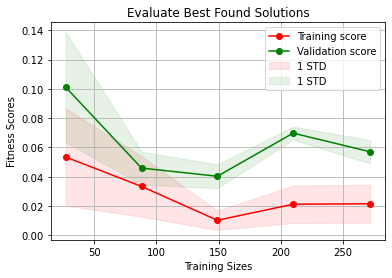

In [6]:
import matplotlib.pyplot as plt

train_scores_mean = np.mean(train_matrix, axis=0)
train_scores_std = np.std(train_matrix, axis=0)
test_scores_mean = np.mean(validation_matrix, axis=0)
test_scores_std = np.std(validation_matrix, axis=0)

# Plot learning curve
plt.grid()

plt.fill_between(
    train_sizes,
    list(
        map(
            lambda low: low if low >= 0 else 0,  # replace values with 0 when negative
            train_scores_mean - train_scores_std,
        )
    ),
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
    label="1 STD",
)

plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
    label="1 STD",
)

plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Validation score")
plt.legend(loc="best")
plt.title("Evaluate Best Found Solutions")
plt.xlabel("Training Sizes")
plt.ylabel("Fitness Scores")

In [7]:
best_hof

NameError: name 'best_hof' is not defined